Pridobitev podatkov

In [212]:
import pandas as pd
import glob
import warnings
import platform
from copy import copy
warnings.filterwarnings('ignore')

if (platform.system() == 'Windows'):
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('\\')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}
    
    # MAC IN LINUX IMATA DRUGACNE OZNAKE
else:
    l = glob.glob('data/*.csv')
    for i in range(len(l)):
        l[i] = l[i].split('/')[-1].upper()

    # slovar poti do .csv datotek
    csv_data = {data.split('/')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [213]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

In [214]:
dataframes_copy = copy(dataframes)
frames = [copy(dataframes_copy['KD2009'])]
for i in range(10, 21):
    frames.append(copy(dataframes_copy['KD20'+str(i)]))

all_data = pd.concat(frames)
all_data

# tu se naredi preslikava glede iz neberljive oblike datuma v berljivo obliko
mesci = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
mesci2 = []
leta = []

# this dataframe is the one used for the analysis
full_KD = all_data

for i in full_KD['MesecStoritve']:
    mesec = str(i)[:-4]
    leto = str(i)[-4:]

    leta.append(leto)
    mesci2.append(mesci[int(mesec) - 1])


full_KD.rename(columns={'MesecStoritve': 'CasovnaOznaka'}, inplace=True)
full_KD['MesecStoritve'] = mesci2
full_KD['LetoStoritve'] = leta
full_KD['LetoStoritve'] = full_KD['LetoStoritve'].astype(int)

In [215]:
color_pallete = ['#FF0170', '#F72585', '#B5179E', '#7209B7', '#560BAD', '#480CA8', '#3A0CA3', '#3F37C9', '#4361EE', '#4895EF', '#4CC9F0', '#82D8F2']

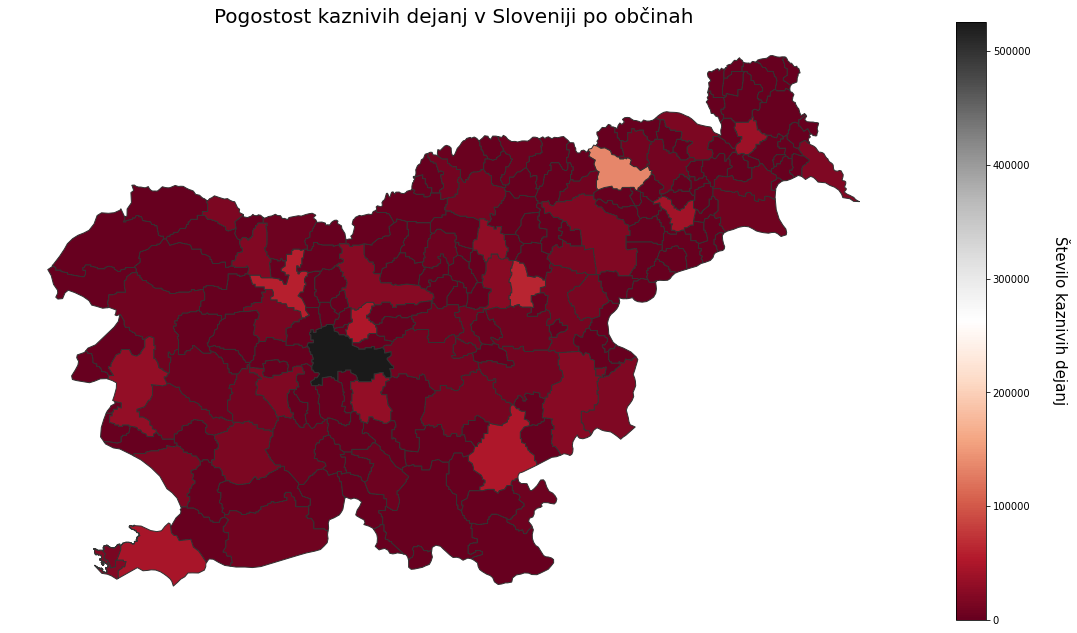

In [333]:
import geopandas as gpd
import matplotlib.pyplot as plt

cmap_colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

obcine = dict(full_KD.UpravnaEnotaStoritve.value_counts())
obcine_popravljene = {}
odstrani = ['NEZNANA OBČ', 'NEZNANA UE', 'NI PODATKA']
for o in odstrani:
    if o in obcine.keys():
        obcine.pop(o)

for key, value in obcine.items():
    crke = ['Č', 'Š', 'Ž']
    k = key
    for i in 'ČŠŽ':
        k = k.replace(i, '?')
    obcine_popravljene[k] = value
obcine_popravljene

obcine_popravljene['LJUBLJANA'] = obcine_popravljene['LJUBLJANA']

slovenia = gpd.read_file('slovenija_map/obcine/obc.shp', encoding='cp1250')
slovenia['name_2'] = slovenia['name_2'].str.upper()

list_of_all = list(slovenia.name_2)
list_stevio = []

for i in list_of_all:
    if i in obcine_popravljene.keys():
        list_stevio.append(obcine_popravljene[i])
    else:
        list_stevio.append(0)

slovenia['stevilo'] = list_stevio

fig, ax = plt.subplots(1, figsize=(20, 20))
plt.axis('off')
plt.title('Pogostost kaznivih dejanj v Sloveniji po občinah', fontsize=20)
slovenia.plot(column='stevilo', cmap='RdGy', ax=ax, edgecolor='.2')
bar_info = plt.cm.ScalarMappable(cmap='RdGy', norm=plt.Normalize(vmin=0, vmax=max(obcine.values())))
bar_info._A = []
cbar = fig.colorbar(bar_info, shrink=0.55)
cbar.set_label('Število kaznivih dejanj', fontsize=15, rotation=270, labelpad=40)

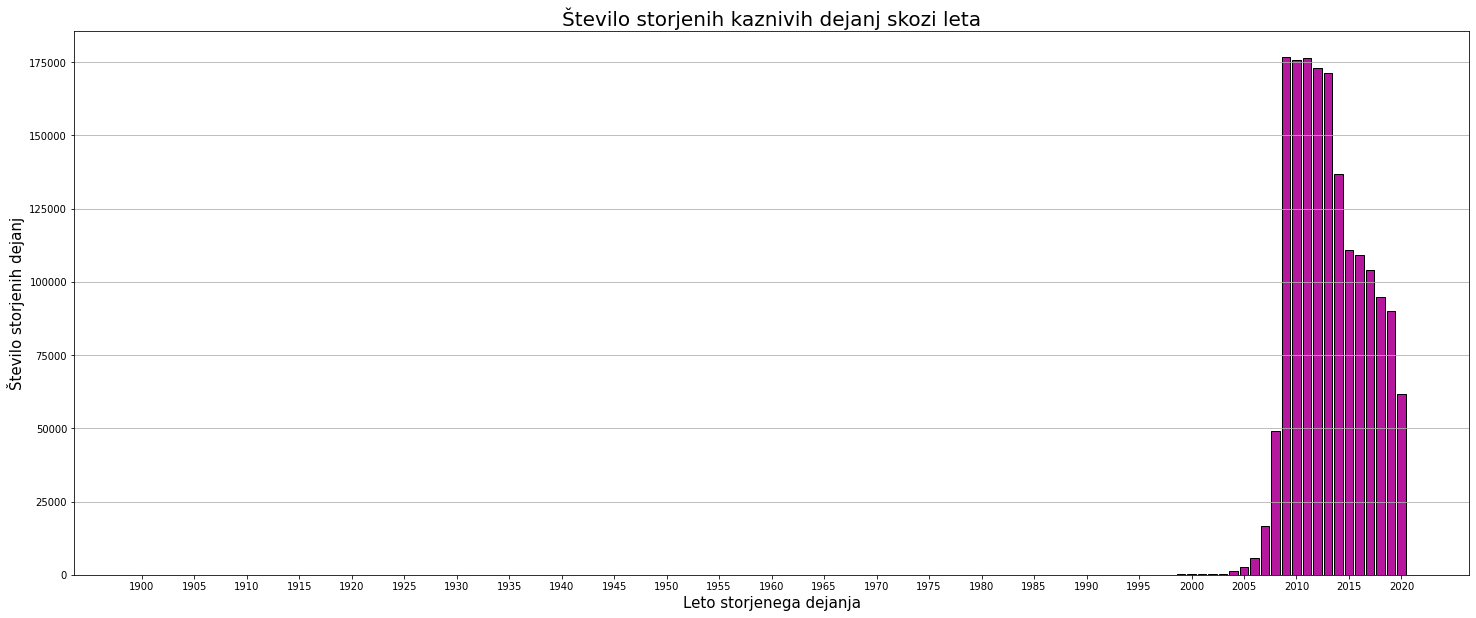

In [217]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

all_years = copy(all_data)
leta = all_years['LetoStoritve'].value_counts().sort_index()
x = list(leta.index)
y = list(leta)

plt.figure(figsize=(25,10))
plt.bar(x, y, color=color_pallete[2], edgecolor='black')
plt.grid(axis='y')
plt.title('Število storjenih kaznivih dejanj skozi leta', fontsize=20)
plt.xlabel('Leto storjenega dejanja', fontsize=15)
plt.ylabel('Število storjenih dejanj', fontsize=15)
plt.xticks(np.arange(x[0], x[-1]+5, step=5))
plt.show()

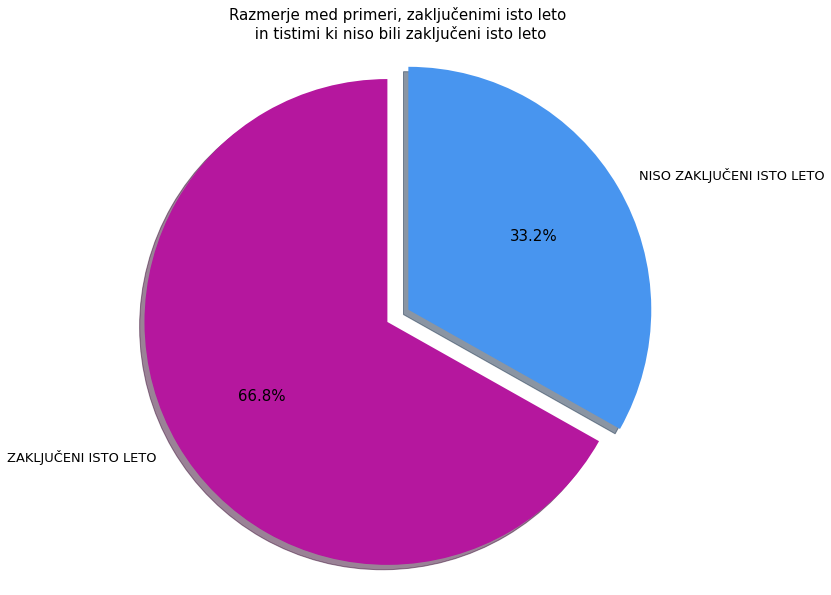

In [218]:
df_istoleto = copy(all_data)
df_not_istoleto = copy(all_data)
df_istoleto = df_istoleto[df_istoleto['LetoZakljucnegaDokumenta'] == df_istoleto['LetoStoritve']]
df_not_istoleto = df_not_istoleto[df_not_istoleto['LetoZakljucnegaDokumenta'] != df_not_istoleto['LetoStoritve']]
zalkjuceni_istoleto = len(df_istoleto)
ne_zalkjuceni_istoleto = len(df_not_istoleto)

x = ['ZAKLJUČENI ISTO LETO', 'NISO ZAKLJUČENI ISTO LETO']
y = [int(zalkjuceni_istoleto), int(ne_zalkjuceni_istoleto)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
patches, texts, autotexts = ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=90, colors=[color_pallete[2], color_pallete[9]])
ax1.axis('equal')
ax1.set_title('Razmerje med primeri, zaključenimi isto leto\n in tistimi ki niso bili zaključeni isto leto', fontsize=15)
for t in autotexts:
    t.set_fontsize(15)
for t in texts:
    t.set_fontsize(13)
plt.show()

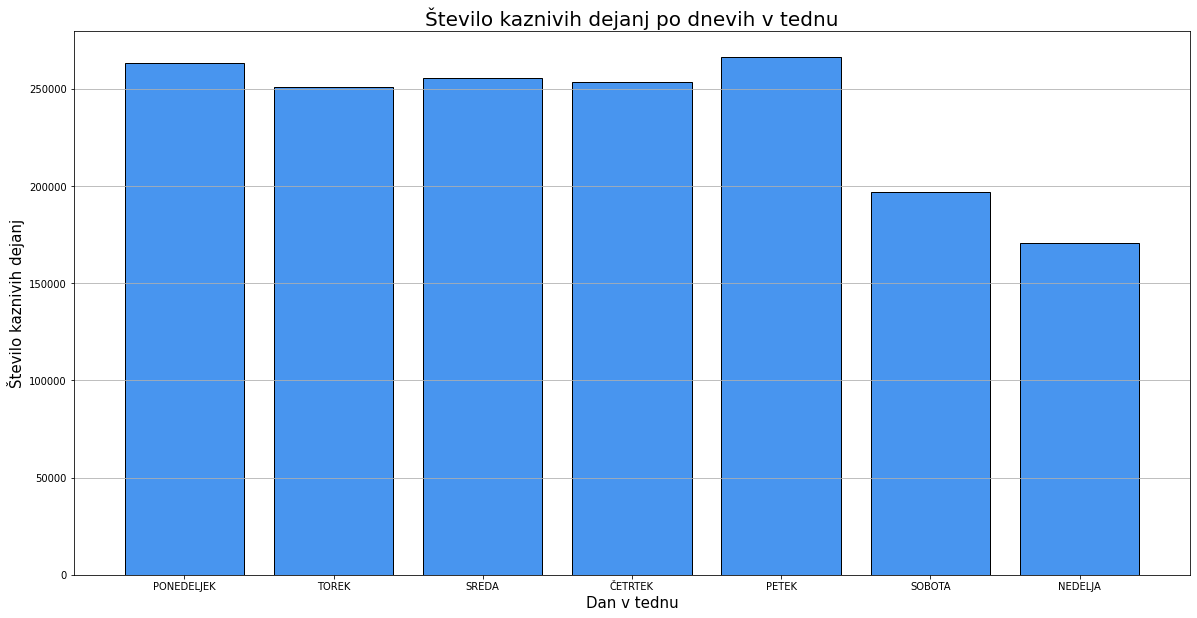

In [219]:
dnevi = all_years.DanVTednu.value_counts().sort_index()
x = ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']
y = [dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA]

plt.figure(figsize=(20,10))
plt.bar(x, y, color=color_pallete[9], edgecolor='black')
plt.title('Število kaznivih dejanj po dnevih v tednu', fontsize=20)
plt.xlabel('Dan v tednu', fontsize=15)
plt.ylabel('Število kaznivih dejanj', fontsize=15)
plt.grid(axis='y')
plt.show()

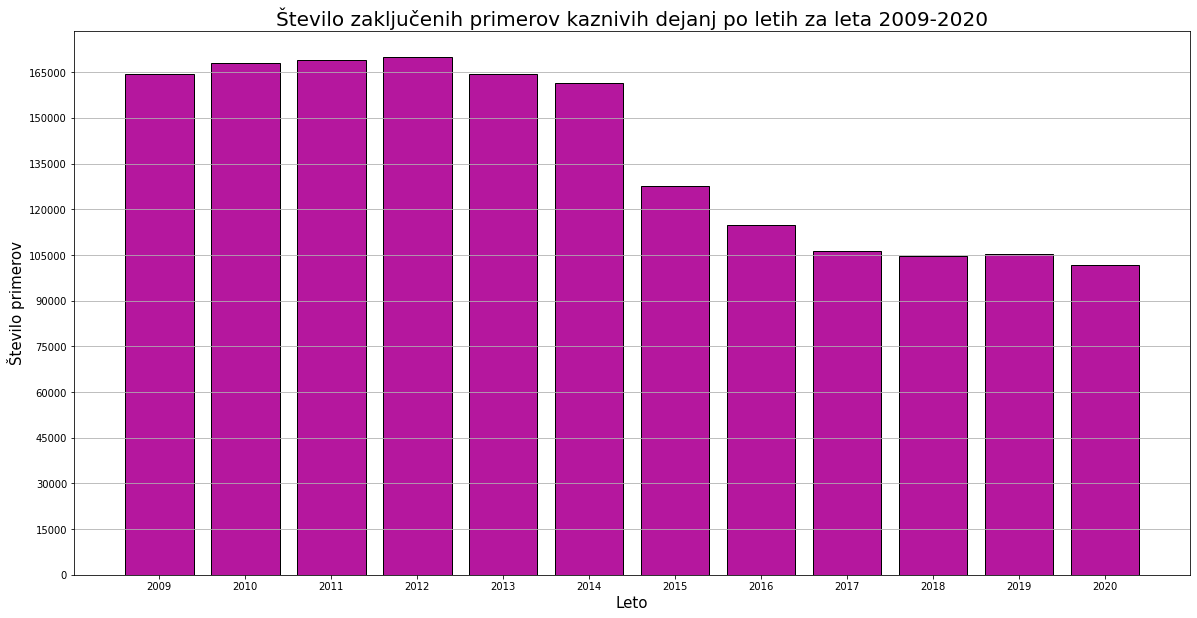

In [220]:
time_dataframes = {k:v for k,v in dataframes.items()}

l_df = copy(list(time_dataframes.values()))

po_letih = [len(df) for df in l_df]

plt.figure(figsize=(20,10))

# subplot 1. prikaz kriminalističih primerov po letih za leta 2009-2020
plt.bar(['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020'], po_letih, color=color_pallete[2], edgecolor='black')
plt.yticks(np.arange(0, 180000, step=15000))
plt.grid(axis='y')
plt.title('Število zaključenih primerov kaznivih dejanj po letih za leta 2009-2020', fontsize=20)
plt.ylabel('Število primerov', fontsize=15)
plt.xlabel('Leto', fontsize=15)
plt.show()

**Ugotavljanje v katerih urah se zgodi največ kriminala**  
Pri tej analizi uporabimo podatke za vsa leta po stolpcu **UraStoritve** ter jih povprečimo da dobimo bolj splošne rezultate

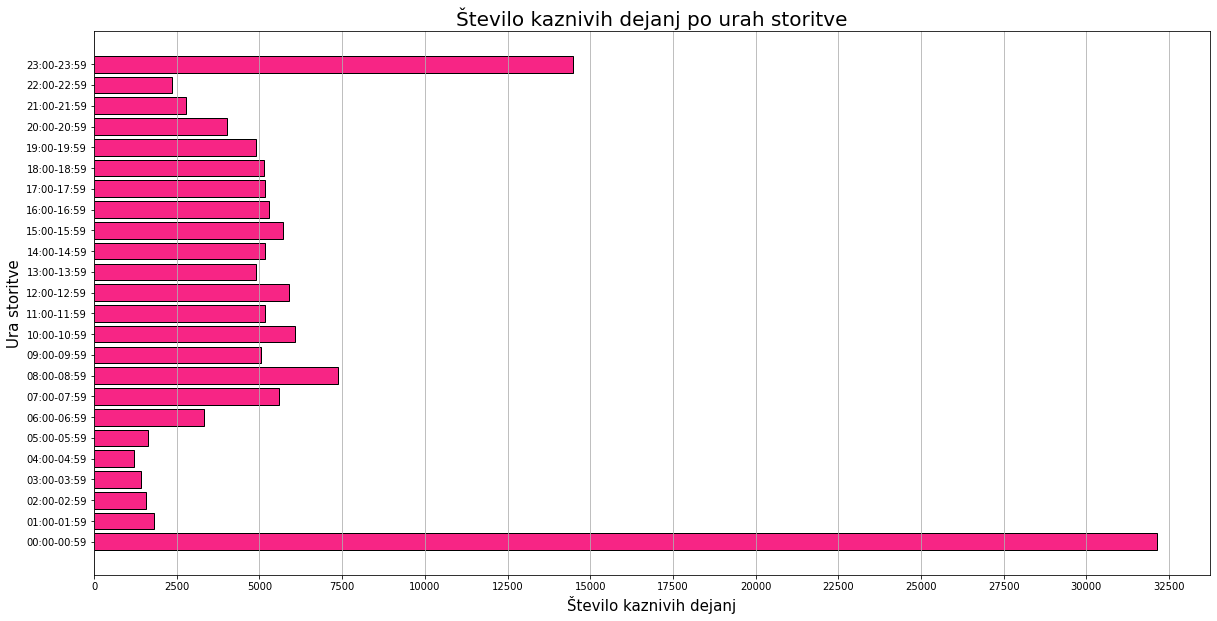

In [221]:
dataframes_fixed_dates = {}

for key, value in time_dataframes.items():
    df1 = copy(time_dataframes[key])
    df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
    df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')
    dataframes_fixed_dates[key] = df1

ure_vse = []
povp_ure = []
ure = [
    '00:00-00:59',
    '01:00-01:59',
    '02:00-02:59',
    '03:00-03:59',
    '04:00-04:59',
    '05:00-05:59',
    '06:00-06:59',
    '07:00-07:59',
    '08:00-08:59',
    '09:00-09:59',
    '10:00-10:59',
    '11:00-11:59',
    '12:00-12:59',
    '13:00-13:59',
    '14:00-14:59',
    '15:00-15:59',
    '16:00-16:59',
    '17:00-17:59',
    '18:00-18:59',
    '19:00-19:59',
    '20:00-20:59',
    '21:00-21:59',
    '22:00-22:59',
    '23:00-23:59',
]

i = 0
for key, value in dataframes_fixed_dates.items():
    ure_vse.append(list(value['UraStoritve'].value_counts().sort_index()))
    i += 1

for i in range(len(ure_vse[1])):
    x = 0
    for ura in ure_vse:
        x += ura[i]
    povp_ure.append(x/len(ure_vse))

plt.figure(figsize=(20,10))
plt.barh(ure, povp_ure, color='#F72585', edgecolor='black')
plt.grid(axis='x')
plt.xticks(np.arange(0, 35000, step=2500))
plt.title('Število kaznivih dejanj po urah storitve', fontsize=20)
plt.ylabel('Ura storitve', fontsize=15)
plt.xlabel('Število kaznivih dejanj', fontsize=15)
plt.show()

**UGOTOVITVE:** Iz ugotovitev se največ kaznivih dejanj zgodi med **23:00 in 01:00**. To se zdi smiselno, saj večina ljudi takrat zapustijo lokale(verjetno vinjeni) in se zato zgodi več kaznivih dejanj. Število kaznivih dejanj pade v urah spanca **01:00-06:00** ter **21:00-23:00**. Podnevi kazniva dejanja narastejo, ampak še vedno ne tako kot med 23:00 in 01:00.

In [222]:
full_KD['PovprecnaSkoda'] = 'nan'

full_KD['Skoda'] = full_KD['Skoda'].replace(np.nan, 'BREZ')

full_KD.loc[full_KD['Skoda'] == 'DO 100 EUR', 'PovprecnaSkoda'] = float(100)
full_KD.loc[full_KD['Skoda'] == '100 - 1.000 EUR', 'PovprecnaSkoda'] = float((100+1000)/2)
full_KD.loc[full_KD['Skoda'] == '1.000 - 10.000 EUR', 'PovprecnaSkoda'] = float((1000+10000)/2)
full_KD.loc[full_KD['Skoda'] == '10.000 - 100.000 EUR', 'PovprecnaSkoda'] = float((10000+100000)/2)
full_KD.loc[full_KD['Skoda'] == '100.000 - 500.000 EUR', 'PovprecnaSkoda'] = float((100000+5000000)/2)
full_KD.loc[full_KD['Skoda'] == 'NAD 500.000 EUR', 'PovprecnaSkoda'] = float(500000)
full_KD.loc[full_KD['Skoda'] == 'BREZ', 'PovprecnaSkoda'] = float(0)
full_KD.loc[full_KD['Skoda'] == np.nan, 'PovprecnaSkoda'] = float(0)

povprecna_skoda_ura = full_KD.groupby('UraStoritve')['PovprecnaSkoda'].mean().round(1)
povprecna_skoda_mesec = full_KD.groupby('MesecStoritve')['PovprecnaSkoda'].mean().round(1)
povprecna_skoda_dan = full_KD.groupby('DanVTednu')['PovprecnaSkoda'].mean().round(1)
povprecna_skoda_leto = full_KD.groupby('LetoStoritve')['PovprecnaSkoda'].mean().round(1)

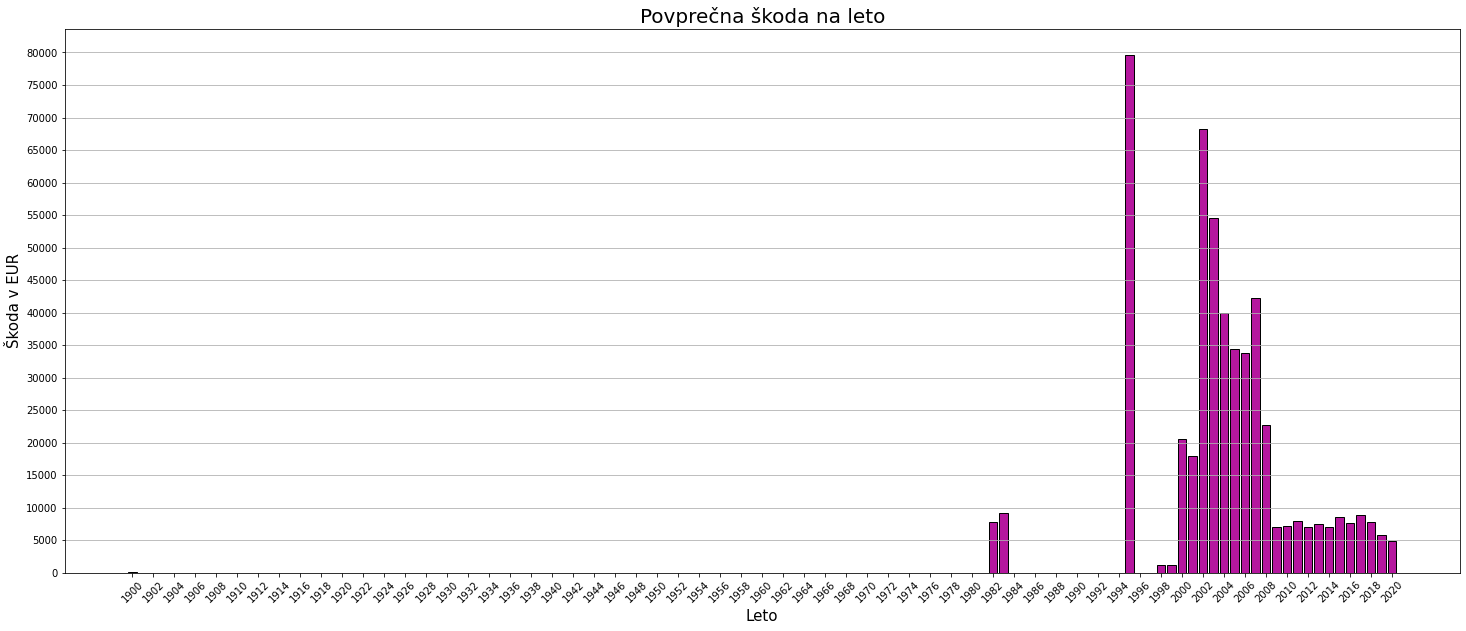

In [223]:
povprecna_skoda_leto = povprecna_skoda_leto.sort_index()
x = list(povprecna_skoda_leto.index)
y = list(povprecna_skoda_leto.values)

plt.figure(figsize=(25,10))
plt.bar(x,y, color=color_pallete[2], edgecolor='black')
plt.xticks(np.arange(x[0], x[-1]+2, step=2), rotation=45)
plt.yticks(np.arange(0, max(y)+5000, step=5000))
plt.grid(axis='y')
plt.title('Povprečna škoda na leto', fontsize=20)
plt.xlabel('Leto', fontsize=15)
plt.ylabel('Škoda v EUR', fontsize=15)
plt.show()

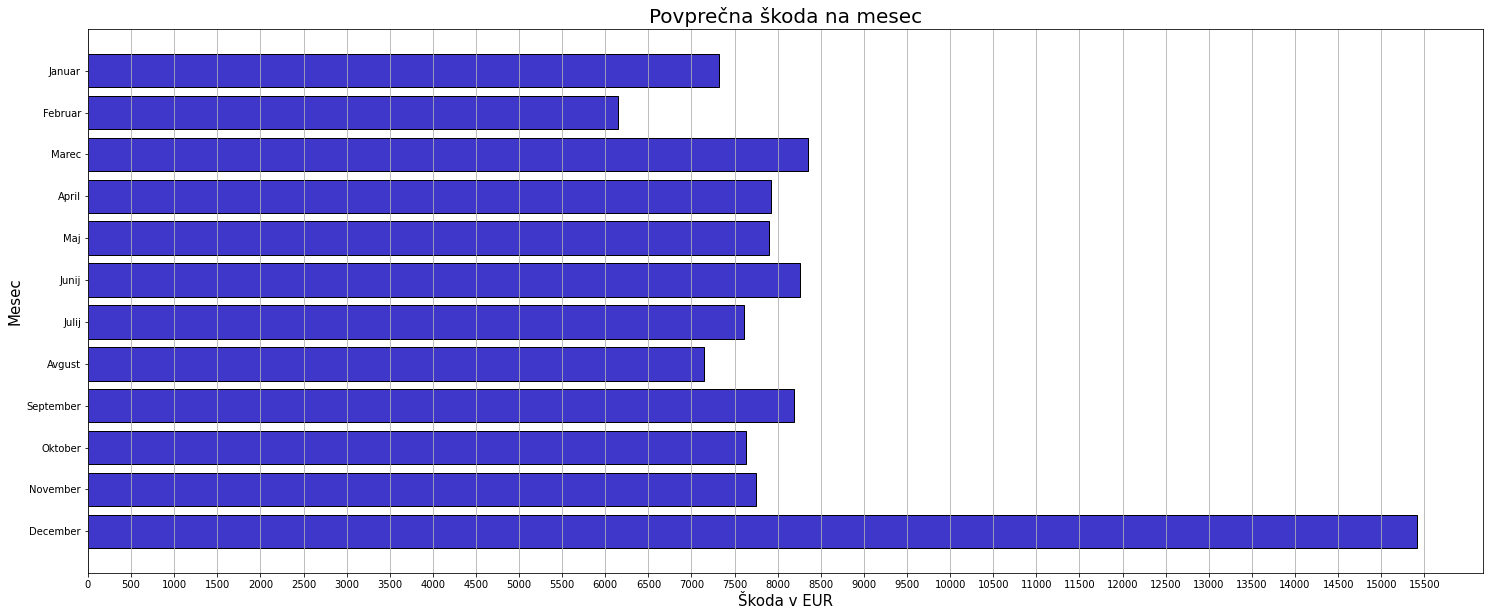

In [224]:
x = ['Januar', 'Februar', 'Marec', 'April', 'Maj', 'Junij', 'Julij', 'Avgust', 'September', 'Oktober', 'November', 'December']
y = [
    povprecna_skoda_mesec.Januar,
    povprecna_skoda_mesec.Februar,
    povprecna_skoda_mesec.Marec,
    povprecna_skoda_mesec.April,
    povprecna_skoda_mesec.Maj,
    povprecna_skoda_mesec.Junij,
    povprecna_skoda_mesec.Julij,
    povprecna_skoda_mesec.Avgust,
    povprecna_skoda_mesec.September,
    povprecna_skoda_mesec.Oktober,
    povprecna_skoda_mesec.November,
    povprecna_skoda_mesec.December
]

x.reverse()
y.reverse()

plt.figure(figsize=(25,10))
plt.barh(x, y, color=color_pallete[7], edgecolor='black')
plt.xticks(np.arange(0, y[0]+500, step=500))
plt.grid(axis='x')
plt.title('Povprečna škoda na mesec', fontsize=20)
plt.xlabel('Škoda v EUR', fontsize=15)
plt.ylabel('Mesec', fontsize=15)
plt.show()


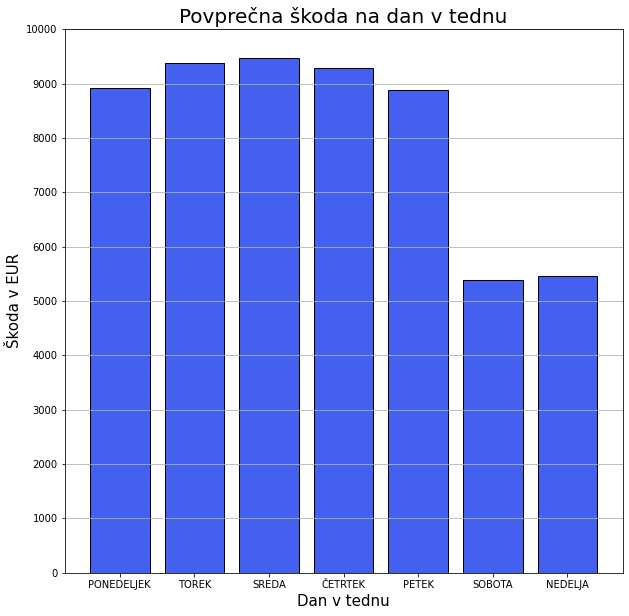

In [225]:
x = ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']
y = [povprecna_skoda_dan.PONEDELJEK,
     povprecna_skoda_dan.TOREK,
     povprecna_skoda_dan.SREDA, 
     povprecna_skoda_dan.ČETRTEK, 
     povprecna_skoda_dan.PETEK, 
     povprecna_skoda_dan.SOBOTA, 
     povprecna_skoda_dan.NEDELJA
]

plt.figure(figsize=(10,10))
plt.bar(x, y, color=color_pallete[8], edgecolor='black')
plt.yticks(np.arange(0, max(y)+1000, step=1000))
plt.grid(axis='y')
plt.title('Povprečna škoda na dan v tednu', fontsize=20)
plt.xlabel('Dan v tednu', fontsize=15)
plt.ylabel('Škoda v EUR', fontsize=15)
plt.show()

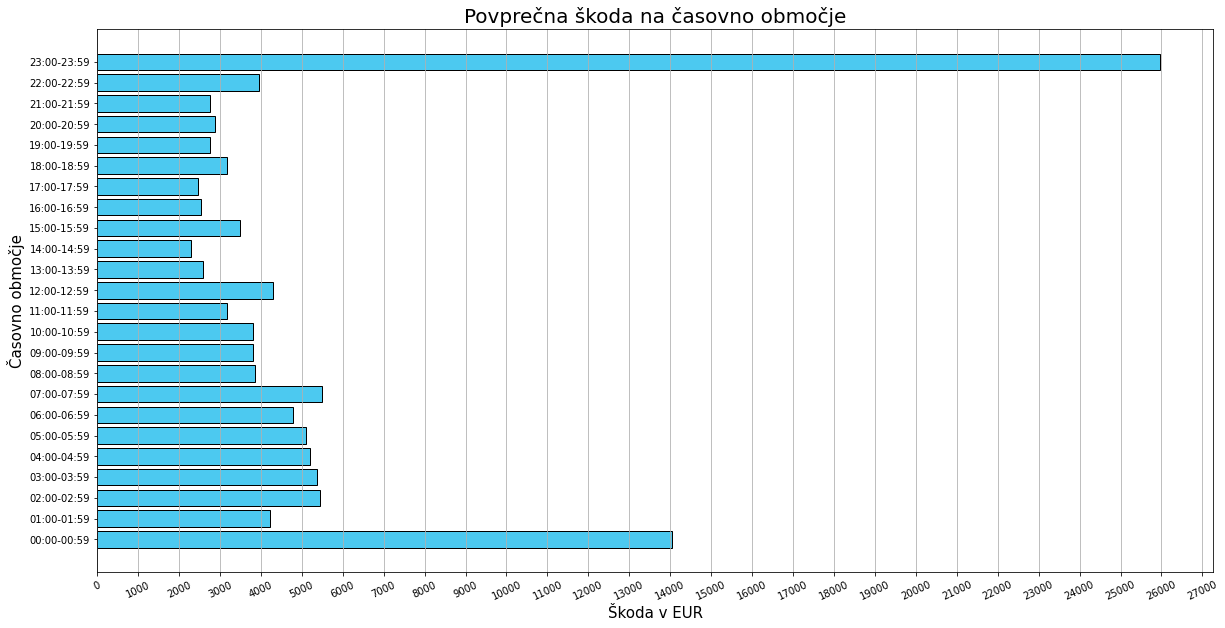

In [226]:
x = list(povprecna_skoda_ura.index)
y = list(povprecna_skoda_ura.values)

plt.figure(figsize=(20,10))
plt.barh(x, y, color=color_pallete[10], edgecolor='black')
plt.xticks(np.arange(0, max(y)+2000, step=1000), rotation=25)
plt.grid(axis='x')
plt.title('Povprečna škoda na časovno območje', fontsize=20)
plt.xlabel('Škoda v EUR', fontsize=15)
plt.ylabel('Časovno območje', fontsize=15)
plt.show()